<a href="https://colab.research.google.com/github/aravind0654/aravindb0654/blob/master/LinReg_auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc4


In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 5us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Europe          0
Japan           0
USA             0
dtype: int64

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

KeyError: ignored

In [ ]:
dataset = pd.get_dummies(dataset, prefix = "", prefix_sep =  "")
dataset.head()

In [ ]:
train_dataset = dataset.sample(frac = 0.8, random_state= 0)
test_dataset  = dataset.drop(train_set.index)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Europe        392 non-null    uint8  
 8   Japan         392 non-null    uint8  
 9   USA           392 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 35.6 KB


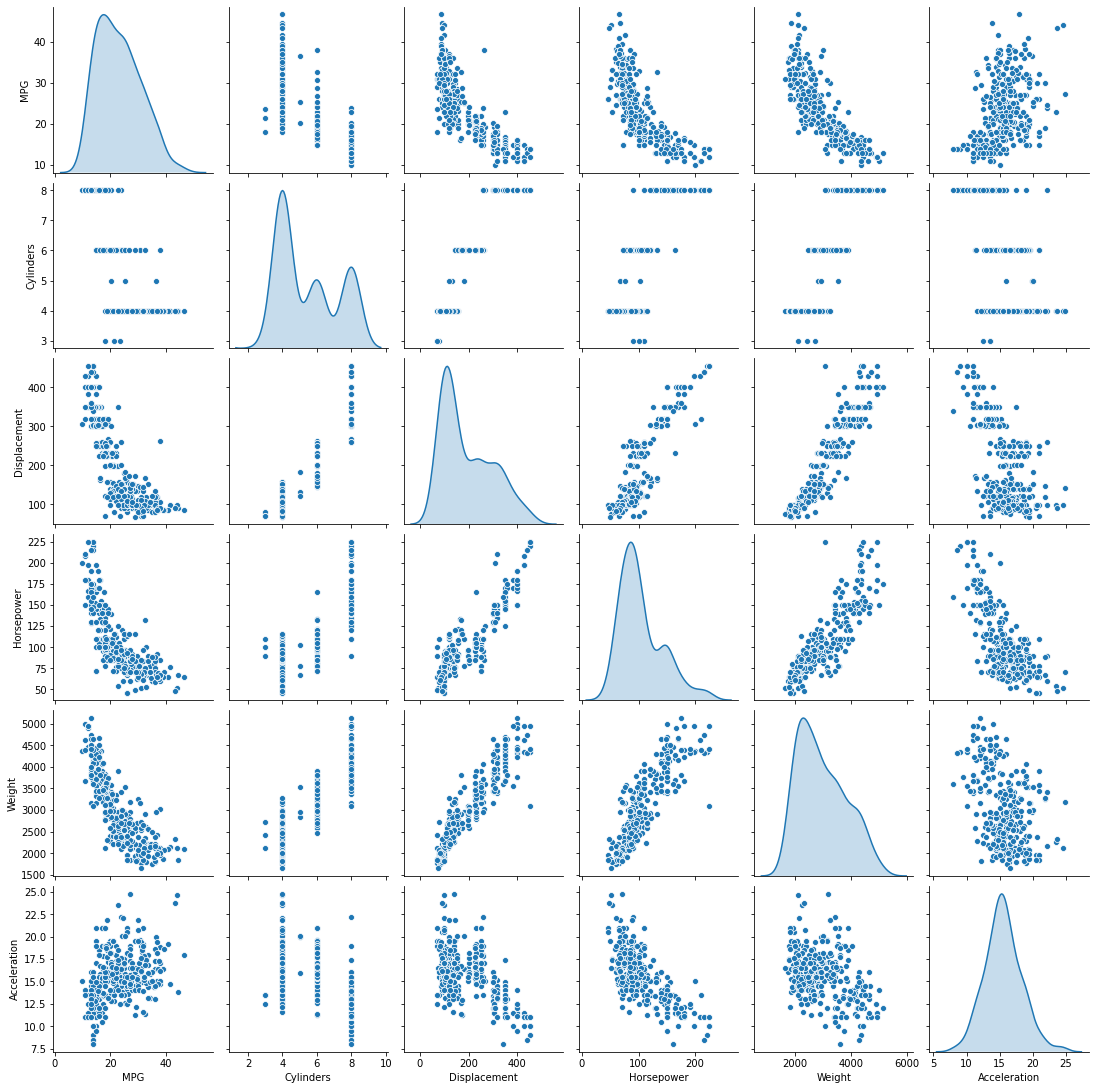

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration"]], diag_kind = "kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

In [ ]:
def norm(x):
  return(x - train_stats["mean"])/train_stats["std"]
normed_train_set =  norm(train_dataset)
normed_test_set =  norm(test_dataset) 

In [ ]:
normed_train_set.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,-0.465148,-0.495225,0.774676
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,-0.465148,-0.495225,0.774676
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-0.465148,2.012852,-1.286751
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-0.465148,2.012852,-1.286751
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,2.143005,-0.495225,-1.286751


In [ ]:
def build_model():
  model = keras.Sequential([
   layers.Dense(64, activation = "relu", input_shape = [len(train_dataset.keys())]), 
   layers.Dense(64, activation = "relu"),
   layers.Dense(1)
   ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss = "mse",
                 optimizer = optimizer,
                 metrics = ["mae", "mse"])
  return(model)

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(normed_train_set[:10])

array([[ 0.3768764 ],
       [ 0.18751404],
       [-0.25165346],
       [ 0.21983473],
       [-0.00335776],
       [ 0.20087528],
       [-0.03797005],
       [ 0.87353617],
       [ 0.16661093],
       [-0.13381284]], dtype=float32)

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
EPOCHS = 1000

history = model.fit(
  normed_train_set, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:560.7037,  mae:22.4147,  mse:560.7037,  val_loss:545.3049,  val_mae:22.0255,  val_mse:545.3049,  
....................................................................................................
Epoch: 100, loss:5.9949,  mae:1.6991,  mse:5.9949,  val_loss:8.5912,  val_mae:2.2485,  val_mse:8.5912,  
....................................................................................................
Epoch: 200, loss:5.2972,  mae:1.5864,  mse:5.2972,  val_loss:8.4323,  val_mae:2.2265,  val_mse:8.4323,  
....................................................................................................
Epoch: 300, loss:4.8815,  mae:1.4743,  mse:4.8815,  val_loss:8.3670,  val_mae:2.1720,  val_mse:8.3670,  
....................................................................................................
Epoch: 400, loss:4.4489,  mae:1.3817,  mse:4.4489,  val_loss:8.3025,  val_mae:2.1184,  val_mse:8.3025,  
..............................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.274189,0.923507,2.274189,9.641012,2.376639,9.641012,995
996,2.377167,0.987232,2.377167,9.632028,2.371119,9.632028,996
997,2.577950,1.010891,2.577950,9.410338,2.307371,9.410338,997
998,2.465909,0.974689,2.465909,9.681904,2.359988,9.681904,998
999,2.249227,0.931061,2.249227,10.036811,2.369930,10.036811,999


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MAE [MPG]')

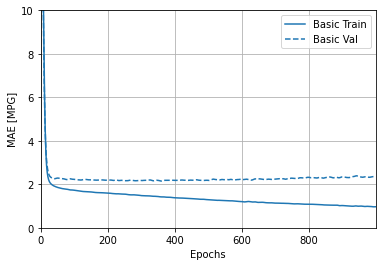

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_set, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:570.5176,  mae:22.6462,  mse:570.5176,  val_loss:559.9515,  val_mae:22.4182,  val_mse:559.9515,  
..........................................

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_set, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))